# Importing libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
df = pd.read_csv('msrp.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,702876,702977,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1
1,1,2108705,2108831,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0
2,2,1330381,1330521,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1
3,3,3344667,3344648,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0
4,4,1236820,1236712,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1


In [ ]:
df.shape

(5801, 6)

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
#creating a new dataframe consisting only of the questions
ques_df = df[['question1', 'question2']]
ques_df

,question1,question2
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr..."
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ..."
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set..."
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...
...,...,...
5796,"After Hughes refused to rehire Hernandez , he ...",Hernandez filed an Equal Employment Opportunit...
5797,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...
5798,Bethany Hamilton remained in stable condition ...,"Bethany , who remained in stable condition aft..."
5799,"Last week the power station ’ s US owners , AE...","The news comes after Drax 's American owner , ..."


In [ ]:
temp_dframe = df[['question1', 'question2', 'is_duplicate']].copy()
temp_dframe

,question1,question2,is_duplicate
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1
...,...,...,...
5796,"After Hughes refused to rehire Hernandez , he ...",Hernandez filed an Equal Employment Opportunit...,0
5797,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...,0
5798,Bethany Hamilton remained in stable condition ...,"Bethany , who remained in stable condition aft...",0
5799,"Last week the power station ’ s US owners , AE...","The news comes after Drax 's American owner , ...",1


# Feature engineering

## Preprocessing 

In [ ]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [ ]:
temp_dframe['question1'] = temp_dframe['question1'].apply(preprocess)
temp_dframe['question2'] = temp_dframe['question2'].apply(preprocess)
temp_dframe

,question1,question2,is_duplicate
0,amrozi accused his brother whom he called ...,referring to him as only the witness amr...,1
1,yucaipa owned dominick s before selling the c...,yucaipa bought dominick s in 1995 for dollar ...,0
2,they had published an advertisement on the int...,on june 10 the ship s owners had published ...,1
3,around 0335 gmt tab shares were up 19 cents ...,tab shares jumped 20 cents or 4 6 percent ...,0
4,the stock rose dollar 2 11 or about 11 perce...,pg e corp shares jumped dollar 1 63 or 8 pe...,1
...,...,...,...
5796,after hughes refused to rehire hernandez he ...,hernandez filed an equal employment opportunit...,0
5797,there are 103 democrats in the assembly and 47...,democrats dominate the assembly while republic...,0
5798,bethany hamilton remained in stable condition ...,bethany who remained in stable condition aft...,0
5799,last week the power station s us owners ae...,the news comes after drax s american owner ...,1


## Numeric metrics

### Question string length 

In [ ]:
temp_dframe['q1_len'] = temp_dframe['question1'].str.len() 
temp_dframe['q2_len'] = temp_dframe['question2'].str.len()

### No. of words in question

In [ ]:
temp_dframe['q1_num_words'] = temp_dframe['question1'].apply(lambda row: (len(row.split(" "))))
temp_dframe['q2_num_words'] = temp_dframe['question2'].apply(lambda row: int(len(row.split(" "))))

### Common words between the questions

In [ ]:
#function that searches for common words between the 2 sentences
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [ ]:
temp_dframe['word_common'] = temp_dframe.apply(common_words, axis=1)

### Total words (q1+q2)

In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
temp_dframe['word_total'] = temp_dframe.apply(total_words, axis=1)

### Word share of common words 

In [ ]:
temp_dframe['word_share'] = round(temp_dframe['word_common']/temp_dframe['word_total'],2)
temp_dframe

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,amrozi accused his brother whom he called ...,referring to him as only the witness amr...,1,101,109,22,22,11,30,0.37
1,yucaipa owned dominick s before selling the c...,yucaipa bought dominick s in 1995 for dollar ...,0,92,111,18,23,11,38,0.29
2,they had published an advertisement on the int...,on june 10 the ship s owners had published ...,1,103,113,22,24,13,34,0.38
3,around 0335 gmt tab shares were up 19 cents ...,tab shares jumped 20 cents or 4 6 percent ...,0,133,91,37,24,14,43,0.33
4,the stock rose dollar 2 11 or about 11 perce...,pg e corp shares jumped dollar 1 63 or 8 pe...,1,113,108,27,26,13,42,0.31
...,...,...,...,...,...,...,...,...,...,...
5796,after hughes refused to rehire hernandez he ...,hernandez filed an equal employment opportunit...,0,103,77,16,10,5,24,0.21
5797,there are 103 democrats in the assembly and 47...,democrats dominate the assembly while republic...,0,58,68,10,9,4,18,0.22
5798,bethany hamilton remained in stable condition ...,bethany who remained in stable condition aft...,0,86,106,12,20,11,27,0.41
5799,last week the power station s us owners ae...,the news comes after drax s american owner ...,1,161,170,32,35,21,53,0.40


## Removing the text columns

In [ ]:
final_df = temp_dframe.drop(columns=['question1', 'question2'])
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,1,101,109,22,22,11,30,0.37
1,0,92,111,18,23,11,38,0.29
2,1,103,113,22,24,13,34,0.38
3,0,133,91,37,24,14,43,0.33
4,1,113,108,27,26,13,42,0.31
...,...,...,...,...,...,...,...,...
5796,0,103,77,16,10,5,24,0.21
5797,0,58,68,10,9,4,18,0.22
5798,0,86,106,12,20,11,27,0.41
5799,1,161,170,32,35,21,53,0.40


## Fuzzy ratios

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fuzzywuzzy import fuzz #doesn't require precise inputs. can accomodate distorted data

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4    #creates a list
    
    # fuzz_ratio 
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio shortest substring matching
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio tokenizes and preprocesses by converting all words into lowercase and removing punctuations
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio performs set operation that takes out a set of common tokens 
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
temp_dframe['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
temp_dframe['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
temp_dframe['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
temp_dframe['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))
temp_dframe

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,amrozi accused his brother whom he called ...,referring to him as only the witness amr...,1,101,109,22,22,11,30,0.37,66,68,84,91
1,yucaipa owned dominick s before selling the c...,yucaipa bought dominick s in 1995 for dollar ...,0,92,111,18,23,11,38,0.29,64,63,67,74
2,they had published an advertisement on the int...,on june 10 the ship s owners had published ...,1,103,113,22,24,13,34,0.38,70,79,82,88
3,around 0335 gmt tab shares were up 19 cents ...,tab shares jumped 20 cents or 4 6 percent ...,0,133,91,37,24,14,43,0.33,63,61,67,80
4,the stock rose dollar 2 11 or about 11 perce...,pg e corp shares jumped dollar 1 63 or 8 pe...,1,113,108,27,26,13,42,0.31,64,63,72,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,after hughes refused to rehire hernandez he ...,hernandez filed an equal employment opportunit...,0,103,77,16,10,5,24,0.21,60,73,74,78
5797,there are 103 democrats in the assembly and 47...,democrats dominate the assembly while republic...,0,58,68,10,9,4,18,0.22,60,65,67,74
5798,bethany hamilton remained in stable condition ...,bethany who remained in stable condition aft...,0,86,106,12,20,11,27,0.41,74,81,82,94
5799,last week the power station s us owners ae...,the news comes after drax s american owner ...,1,161,170,32,35,21,53,0.40,79,79,81,88


## Removing stopwords

In [ ]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))

def text_to_word(text, remove_stop_words=True): #converting sentence to a list of words
    text = str(text)
    text = text.lower()

    # Cleaning the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()
    
    if remove_stop_words:
        text = [wd for wd in text if wd not in stops]
    return(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text_to_word('the car flew over the nest')

['car', 'flew', 'nest']

In [ ]:
temp_dframe['question1'] = temp_dframe['question1'].map(lambda x: text_to_word(x))
temp_dframe['question2'] = temp_dframe['question2'].map(lambda x: text_to_word(x))
temp_dframe

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,"[amrozi, accused, brother, called, witness, de...","[referring, witness, amrozi, accused, brother,...",1,101,109,22,22,11,30,0.37,66,68,84,91
1,"[yucaipa, owned, dominick, selling, chain, saf...","[yucaipa, bought, dominick, 1995, dollar, 693,...",0,92,111,18,23,11,38,0.29,64,63,67,74
2,"[published, advertisement, internet, june, 10,...","[june, 10, ship, owners, published, advertisem...",1,103,113,22,24,13,34,0.38,70,79,82,88
3,"[around, 0335, gmt, tab, shares, 19, cents, 4,...","[tab, shares, jumped, 20, cents, 4, 6, percent...",0,133,91,37,24,14,43,0.33,63,61,67,80
4,"[stock, rose, dollar, 2, 11, 11, percent, clos...","[pg, e, corp, shares, jumped, dollar, 1, 63, 8...",1,113,108,27,26,13,42,0.31,64,63,72,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,"[hughes, refused, rehire, hernandez, complaine...","[hernandez, filed, equal, employment, opportun...",0,103,77,16,10,5,24,0.21,60,73,74,78
5797,"[103, democrats, assembly, 47, republicans]","[democrats, dominate, assembly, republicans, c...",0,58,68,10,9,4,18,0.22,60,65,67,74
5798,"[bethany, hamilton, remained, stable, conditio...","[bethany, remained, stable, condition, attack,...",0,86,106,12,20,11,27,0.41,74,81,82,94
5799,"[last, week, power, station, us, owners, aes, ...","[news, comes, drax, american, owner, aes, corp...",1,161,170,32,35,21,53,0.40,79,79,81,88


## Lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from nltk.corpus import wordnet 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def lemmatize_text(text): 
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text]

In [ ]:
temp_dframe['question1'] = temp_dframe['question1'].map(lambda x: lemmatize_text(x))
temp_dframe['question2'] = temp_dframe['question2'].map(lambda x: lemmatize_text(x))
temp_dframe

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,"[amrozi, accuse, brother, call, witness, delib...","[refer, witness, amrozi, accuse, brother, deli...",1,101,109,22,22,11,30,0.37,66,68,84,91
1,"[yucaipa, own, dominick, sell, chain, safeway,...","[yucaipa, bought, dominick, 1995, dollar, 693,...",0,92,111,18,23,11,38,0.29,64,63,67,74
2,"[publish, advertisement, internet, june, 10, o...","[june, 10, ship, owner, publish, advertisement...",1,103,113,22,24,13,34,0.38,70,79,82,88
3,"[around, 0335, gmt, tab, share, 19, cent, 4, 4...","[tab, share, jumped, 20, cent, 4, 6, percent, ...",0,133,91,37,24,14,43,0.33,63,61,67,80
4,"[stock, rise, dollar, 2, 11, 11, percent, clos...","[pg, e, corp, share, jumped, dollar, 1, 63, 8,...",1,113,108,27,26,13,42,0.31,64,63,72,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,"[hughes, refuse, rehire, hernandez, complain, ...","[hernandez, file, equal, employment, opportuni...",0,103,77,16,10,5,24,0.21,60,73,74,78
5797,"[103, democrat, assembly, 47, republican]","[democrat, dominate, assembly, republican, con...",0,58,68,10,9,4,18,0.22,60,65,67,74
5798,"[bethany, hamilton, remain, stable, condition,...","[bethany, remain, stable, condition, attack, f...",0,86,106,12,20,11,27,0.41,74,81,82,94
5799,"[last, week, power, station, u, owner, aes, co...","[news, come, drax, american, owner, aes, corp,...",1,161,170,32,35,21,53,0.40,79,79,81,88


## Calculating tf-idf score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#passing dummy tokenizer and preprocessor that simply return what they receive
#done instead of passing the lambda function
def dummy_fun(doc):
    return doc
tfidf = TfidfVectorizer(analyzer='word', tokenizer=dummy_fun,
    preprocessor=dummy_fun, token_pattern=None)  

In [ ]:
doc = ['Don\'t', 'count', 'your', 'chickens', 'before', 'they', 'hatch']
vector_1 = tfidf.fit_transform(doc)
vector_1

<7x17 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [ ]:
temp_dframe['questions'] = temp_dframe['question1'] + temp_dframe['question2']
temp_dframe.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,questions
0,"[amrozi, accuse, brother, call, witness, delib...","[refer, witness, amrozi, accuse, brother, deli...",1,101,109,22,22,11,30,0.37,66,68,84,91,"[amrozi, accuse, brother, call, witness, delib..."
1,"[yucaipa, own, dominick, sell, chain, safeway,...","[yucaipa, bought, dominick, 1995, dollar, 693,...",0,92,111,18,23,11,38,0.29,64,63,67,74,"[yucaipa, own, dominick, sell, chain, safeway,..."
2,"[publish, advertisement, internet, june, 10, o...","[june, 10, ship, owner, publish, advertisement...",1,103,113,22,24,13,34,0.38,70,79,82,88,"[publish, advertisement, internet, june, 10, o..."
3,"[around, 0335, gmt, tab, share, 19, cent, 4, 4...","[tab, share, jumped, 20, cent, 4, 6, percent, ...",0,133,91,37,24,14,43,0.33,63,61,67,80,"[around, 0335, gmt, tab, share, 19, cent, 4, 4..."
4,"[stock, rise, dollar, 2, 11, 11, percent, clos...","[pg, e, corp, share, jumped, dollar, 1, 63, 8,...",1,113,108,27,26,13,42,0.31,64,63,72,79,"[stock, rise, dollar, 2, 11, 11, percent, clos..."


In [ ]:
tfidf_matrix = tfidf.fit_transform(temp_dframe['questions'])
tfidf_matrix

<5801x12507 sparse matrix of type '<class 'numpy.float64'>'
	with 92372 stored elements in Compressed Sparse Row format>

In [ ]:
df1 = pd.DataFrame(tfidf_matrix.toarray())
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.shape

(5801, 12507)

In [ ]:
temp_dframe = temp_dframe.drop(columns=['question1', 'question2', 'questions'])
temp_dframe

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,1,101,109,22,22,11,30,0.37,66,68,84,91
1,0,92,111,18,23,11,38,0.29,64,63,67,74
2,1,103,113,22,24,13,34,0.38,70,79,82,88
3,0,133,91,37,24,14,43,0.33,63,61,67,80
4,1,113,108,27,26,13,42,0.31,64,63,72,79
...,...,...,...,...,...,...,...,...,...,...,...,...
5796,0,103,77,16,10,5,24,0.21,60,73,74,78
5797,0,58,68,10,9,4,18,0.22,60,65,67,74
5798,0,86,106,12,20,11,27,0.41,74,81,82,94
5799,1,161,170,32,35,21,53,0.40,79,79,81,88


In [ ]:
temp_dframe = pd.concat([temp_dframe, df1], axis=1)
temp_dframe

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,fuzz_ratio,fuzz_partial_ratio,...,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506
0,1,101,109,22,22,11,30,0.37,66,68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,92,111,18,23,11,38,0.29,64,63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,103,113,22,24,13,34,0.38,70,79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,133,91,37,24,14,43,0.33,63,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,113,108,27,26,13,42,0.31,64,63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,0,103,77,16,10,5,24,0.21,60,73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5797,0,58,68,10,9,4,18,0.22,60,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5798,0,86,106,12,20,11,27,0.41,74,81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5799,1,161,170,32,35,21,53,0.40,79,79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting into training and test set

In [ ]:
#Splitting the data into training and testing data
y = temp_dframe[['is_duplicate']] 
x = temp_dframe.drop(['is_duplicate'], axis=1)
#we can now provide x and y to the spliting function
x.head(10)

,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,...,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506
0,101,109,22,22,11,30,0.37,66,68,84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,92,111,18,23,11,38,0.29,64,63,67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103,113,22,24,13,34,0.38,70,79,82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,133,91,37,24,14,43,0.33,63,61,67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,113,108,27,26,13,42,0.31,64,63,72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,95,143,18,28,14,37,0.38,77,96,81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,86,90,24,23,9,39,0.23,53,54,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,52,60,10,13,7,21,0.33,77,67,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,88,93,21,17,7,35,0.20,55,58,63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,90,71,18,12,9,28,0.32,83,80,79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

,is_duplicate
0,1
1,0
2,1
3,0
4,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    temp_dframe.iloc[:,1:].values,
    temp_dframe.iloc[:,0].values,
    test_size=0.2,
    random_state=1)

# Models implemented

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7571059431524548

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.37      0.49       372
           1       0.76      0.94      0.84       789

    accuracy                           0.76      1161
   macro avg       0.75      0.65      0.67      1161
weighted avg       0.75      0.76      0.73      1161



## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7545219638242894

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52       372
           1       0.77      0.91      0.83       789

    accuracy                           0.75      1161
   macro avg       0.73      0.67      0.68      1161
weighted avg       0.75      0.75      0.73      1161



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred2 = nb.predict(X_test)
accuracy_score(y_test, y_pred2)

0.5900086132644272

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.39      0.51      0.44       372
           1       0.73      0.63      0.68       789

    accuracy                           0.59      1161
   macro avg       0.56      0.57      0.56      1161
weighted avg       0.62      0.59      0.60      1161



# Performance metrics

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

For Random Forest model

In [ ]:
cf_m1 = confusion_matrix(y_test,y_pred)
cf_m1

array([[137, 235],
       [ 47, 742]])

In [ ]:
import seaborn as sns
sns.heatmap(cf_m1/np.sum(cf_m1), annot=True, 
            fmt='.2%', cmap='Blues')

For XGBoost model

In [ ]:
cf_m2 = confusion_matrix(y_test,y_pred1)
cf_m2

array([[155, 217],
       [ 68, 721]])

In [ ]:
sns.heatmap(cf_m2/np.sum(cf_m2), annot=True, 
            fmt='.2%', cmap='Blues')

For Naive Bayes model

In [ ]:
cf_m3 = confusion_matrix(y_test,y_pred2)
cf_m3

array([[190, 182],
       [294, 495]])

## Comparison analysis

### Tabular format

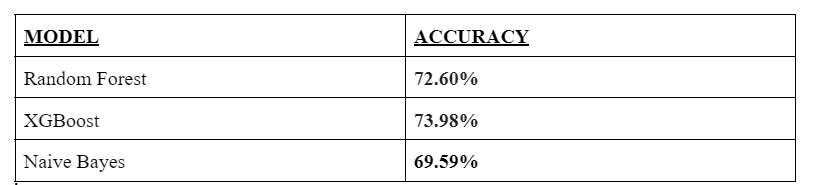

